In [1]:
import json
import geopandas as gpd
%matplotlib inline

In [2]:
fields = gpd.read_file('kern.json')

In [3]:
fields.columns

Index(['Crop2014', 'Acres', 'County', 'Comments', 'Source', 'ModBy',
       'DateApply', 'LstModDat', 'DWRLegend', 'Shape_STAr', 'Shape_STLe',
       'FID_1', 'CropPrice', 'WaterConsu', 'AcrePrice', 'CENTROID_X',
       'CENTROID_Y', 'CENTROID_Z', 'CENTROID_M', 'geometry'],
      dtype='object')

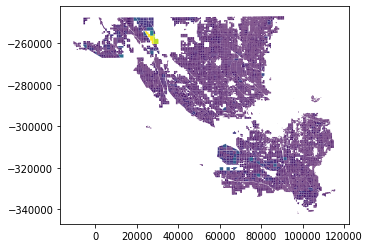

In [8]:
fields.plot(column='Acres')

In [14]:
import folium
import matplotlib.pyplot as plt

In [15]:
x = fields['CENTROID_X'].mean()
y = fields['CENTROID_Y'].mean()

In [25]:
mapa = folium.Map(location=[x,y])
mapa

AttributeError: 'AxesSubplot' object has no attribute 'gpd'

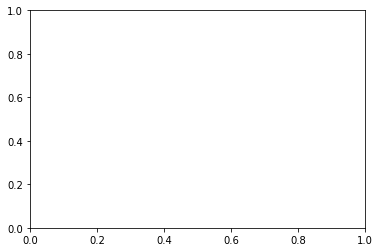

In [22]:
f, ax = plt.subplots(1)
ax.gpd.plot(fields)
m = folium.Map(location=[x,y])

In [26]:
import json
with open('kern.json') as file:
    fields=json.load(file)
    
fields['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[70140.14869999973, -291916.4943999965],
    [69903.94370000347, -291920.616799999],
    [69903.62010000172, -291919.73499999754],
    [69901.34739999744, -291913.5427999981],
    [69903.38630000228, -291908.2409999985],
    [69906.16030000275, -291901.0278999973],
    [69907.22500000425, -291898.2594999969],
    [69967.51220000145, -291897.9417999927],
    [70287.4476000002, -291893.09720000066],
    [70287.45650000275, -291893.25389999896],
    [70288.76600000043, -291916.2505999971],
    [70140.14869999973, -291916.4943999965]]]},
 'properties': {'Crop2014': 'Idle',
  'Acres': 2.06768813,
  'County': 'Kern',
  'Comments': '',
  'Source': 'Land IQ, LLC',
  'ModBy': 'Zhongwu Wang',
  'DateApply': 'July, 2014',
  'LstModDat': '2017-05-07T00:00:00.000Z',
  'DWRLegend': 'I | IDLE',
  'Shape_STAr': 8367.63700294,
  'Shape_STLe': 812.219426999,
  'FID_1': 0,
  'CropPrice': 2109,
  'WaterConsu': 0,
  'AcrePrice': 1020,


In [27]:
fields_to_map = df_optimal.set_index('FID').join(fields.set_index('FID_1'))

NameError: name 'df_optimal' is not defined

In [ ]:
plt.scatter(data=fields, x='CENTROID_X', y='CENTROID_Y', c='grey', s=5, marker='s')
plt.scatter(data=fields_to_map, x='CENTROID_X', y='CENTROID_Y', c='outcome', cmap='plasma', marker='s', s=5)
plt.colorbar()
plt.show()

In [ ]:
fields.describe()

# Folium Example - filesize too large :(

In [40]:
import geopandas as gpd
import contextily as ctx
import folium

In [41]:
fields = gpd.read_file('../spatial/Kern_Fields.shp')

In [42]:
fields.crs = {'init': 'epsg:6414'}
fields.crs

{'init': 'epsg:6414'}

In [43]:
fields = fields.to_crs(epsg=3857)
fields.crs

{'init': 'epsg:3857', 'no_defs': True}

In [44]:
fields_to_map = fields.set_index('FID_1').join(df_optimal.set_index('FID'), how='inner')

In [45]:
plt.rcParams["figure.figsize"] = (20,10)

In [67]:
fields_simmple = fields_to_map.simplify(tolerance = 0.01, preserve_topology=False)
len(fields_simmple)

2797

In [70]:
# folium can't render map when fields > 1000
m = folium.Map(location = [35.346634, -119.066729])
folium.GeoJson(fields_simmple.head(1000)).add_to(m)
m

# Plotly/Dash Example (yagattabekiddinme)

https://github.com/ConnectedSystems/Dash-Choropleth-Example/blob/master/choropleth_example.py